In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(r"C:\Users\tanak\Desktop\Project\part-00000-ecb53c4b-fbd9-4bdf-9b86-6b5752c80d07-c000.snappy.parquet")

In [3]:
df.head()

,INSTRUMENT,SYMBOL,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,DATE,EX_DATE,DIFF_DATE
0,FUTSTK,RELIANCE,0,XX,2174,2179,2073,2088,2088,60827,654661,33078005,-324210,2020-08-31,2020-09-24,24.0
1,FUTSTK,RELIANCE,0,XX,2175,2179,2082,2098,2098,1871,20178,843350,261085,2020-08-31,2020-10-29,59.0
2,FUTSTK,RELIANCE,0,XX,2173,2177,2092,2099,2099,84,909,30300,25250,2020-08-31,2020-11-26,87.0
3,OPTSTK,RELIANCE,1500,CE,580,580,580,580,580,1,10,18685,-505,2020-08-31,2020-09-24,24.0
4,OPTSTK,RELIANCE,1600,CE,552,552,552,552,485,1,10,57065,-505,2020-08-31,2020-09-24,24.0


In [4]:
df1 = df[df['INSTRUMENT'] == 'FUTSTK']

In [5]:
df1.head()

,INSTRUMENT,SYMBOL,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,DATE,EX_DATE,DIFF_DATE
0,FUTSTK,RELIANCE,0,XX,2174,2179,2073,2088,2088,60827,654661,33078005,-324210,2020-08-31,2020-09-24,24.0
1,FUTSTK,RELIANCE,0,XX,2175,2179,2082,2098,2098,1871,20178,843350,261085,2020-08-31,2020-10-29,59.0
2,FUTSTK,RELIANCE,0,XX,2173,2177,2092,2099,2099,84,909,30300,25250,2020-08-31,2020-11-26,87.0
93,FUTSTK,RELIANCE,0,XX,2130,2143,2112,2127,2127,35907,385906,33402215,716595,2020-08-28,2020-09-24,27.0
94,FUTSTK,RELIANCE,0,XX,2091,2151,2091,2133,2133,766,8254,582265,114635,2020-08-28,2020-10-29,62.0


In [6]:
df2 = df1.groupby(['DATE']).mean()

In [7]:
df2.head()

,STRIKE_PR,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,DIFF_DATE
DATE,,,,,,,,,,,
2001-11-09,0.0,266.5,268.0,265.0,267.0,266.5,131.5,208.5,39300.0,39300.0,34.0
2001-11-12,0.0,269.5,272.0,269.5,270.0,268.0,209.5,336.5,92100.0,52800.0,31.0
2001-11-13,0.0,266.0,268.0,266.0,268.0,270.5,224.5,359.5,102600.0,10500.0,30.0
2001-11-14,0.0,271.5,273.5,271.0,273.0,275.0,173.0,282.5,143100.0,40500.0,29.0
2001-11-15,0.0,273.5,277.5,273.5,276.5,279.5,244.0,403.5,145200.0,2100.0,28.0


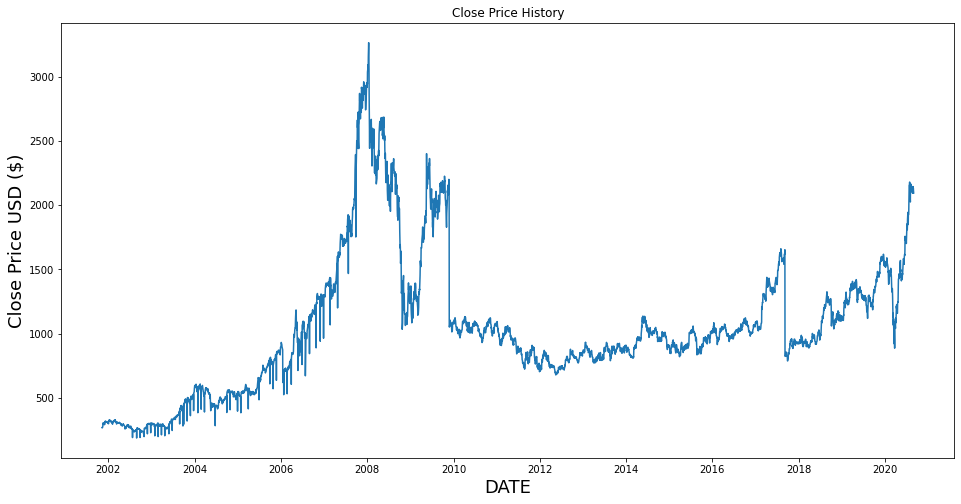

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['CLOSE'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe with only the 'Close column 
data = df2.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

3708

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02621966],
       [0.02719377],
       [0.02654436],
       ...,
       [0.62648483],
       [0.63189653],
       [0.61977433]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print()
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02621966, 0.02719377, 0.02654436, 0.02816787, 0.02930433,
       0.03855832, 0.03487837, 0.03514896, 0.03449955, 0.03449955,
       0.03704305, 0.03498661, 0.0340125 , 0.03385015, 0.03482426,
       0.03725952, 0.04213004, 0.04099359, 0.04213004, 0.04277945,
       0.04131829, 0.04131829, 0.04099359, 0.0403983 , 0.04034418,
       0.03969478, 0.04034418, 0.04034418, 0.04034418, 0.03904538,
       0.03742187, 0.03693482, 0.03953243, 0.03839597, 0.03790892,
       0.03612306, 0.0439159 , 0.0432665 , 0.04277945, 0.04586411,
       0.04570176, 0.04635116, 0.04586411, 0.04472766, 0.0439159 ,
       0.0435912 , 0.04115594, 0.04148064, 0.04148064, 0.04213004,
       0.04164299, 0.04213004, 0.04196769, 0.0426171 , 0.04164299,
       0.03920773, 0.03807127, 0.03839597, 0.03547366, 0.03498661])]

[0.040019482100819875]

[array([0.02621966, 0.02719377, 0.02654436, 0.02816787, 0.02930433,
       0.03855832, 0.03487837, 0.03514896, 0.03449955, 0.03449955,
       0.03704305, 0.03498661, 0.

(3648, 60, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(30, return_sequences=True, 
               input_shape= (x_train.shape[1], 1)))
model.add(LSTM(15, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
57/57 [==============================] - 9s 39ms/step - loss: 0.0529
Epoch 2/10
57/57 [==============================] - 2s 42ms/step - loss: 0.0011
Epoch 3/10
57/57 [==============================] - 2s 42ms/step - loss: 8.4189e-04
Epoch 4/10
57/57 [==============================] - 3s 44ms/step - loss: 8.2763e-04
Epoch 5/10
57/57 [==============================] - 2s 39ms/step - loss: 8.3477e-04
Epoch 6/10
57/57 [==============================] - 2s 43ms/step - loss: 6.3301e-04
Epoch 7/10
57/57 [==============================] - 3s 45ms/step - loss: 6.9795e-04
Epoch 8/10
57/57 [==============================] - 2s 35ms/step - loss: 7.9122e-04
Epoch 9/10
57/57 [==============================] - 2s 31ms/step - loss: 5.3387e-04
Epoch 10/10
57/57 [==============================] - 2s 31ms/step - loss: 6.8587e-04


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 15)                2760      
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 6,616
Trainable params: 6,616
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(927, 60, 1)

In [15]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

(927, 1)

In [16]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


74.76713785673675

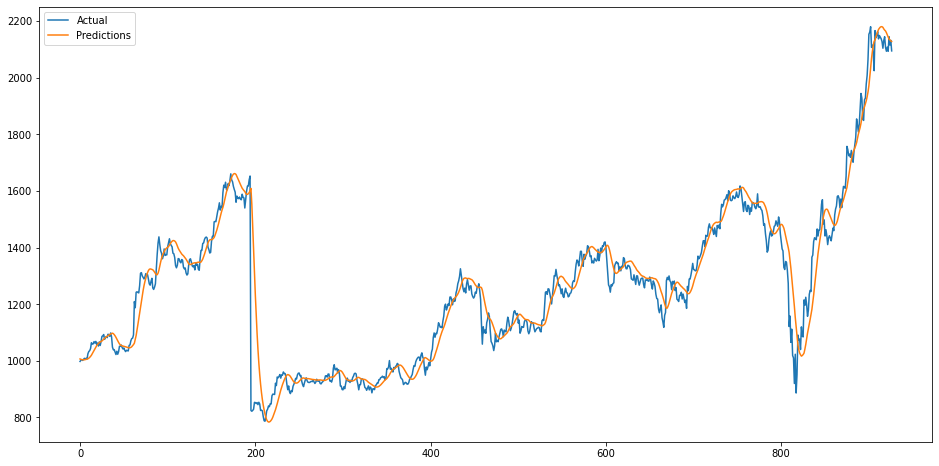

In [17]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.show()

In [18]:
import pickle

In [19]:
model.save('model',save_format='h5')

In [20]:
last_60_days_data = df2.iloc[-60:,:].filter(['CLOSE'])
pickle.dump(last_60_days_data, open('last_60_days_data.h5','wb'))